# Titanic survuval prediction

## Download titanic survival dataset from Kaggle

In [1]:
import opendatasets as od

dataset_url= 'https://www.kaggle.com/c/titanic/data'
dataset_path = '../data'

od.download(dataset_url, data_dir=dataset_path)

Skipping, found downloaded files in "../data\titanic" (use force=True to force download)


## Read and describe the data

In [2]:
import os
import pandas as pd

titanic_data = pd.read_csv(os.path.join(dataset_path, 'titanic', 'train.csv'))
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Peek at data head

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Create binary classifier

In [4]:
import tensorflow as tf

titanic_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=[5]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

titanic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

## Split data to train and validation sets

In [5]:
titanic_copy = titanic_data.copy(deep=True)

titanic_train = titanic_copy.sample(frac=0.8, random_state=0)
titanic_valid = titanic_copy.drop(titanic_train.index)

X_train = titanic_train.copy(deep=True).drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
y_train = titanic_train.copy(deep=True).Survived

X_valid = titanic_valid.copy(deep=True).drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
y_valid = titanic_valid.copy(deep=True).Survived

## Fit the model

In [6]:
history = titanic_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)

## Plotting the learning curve

<AxesSubplot: >

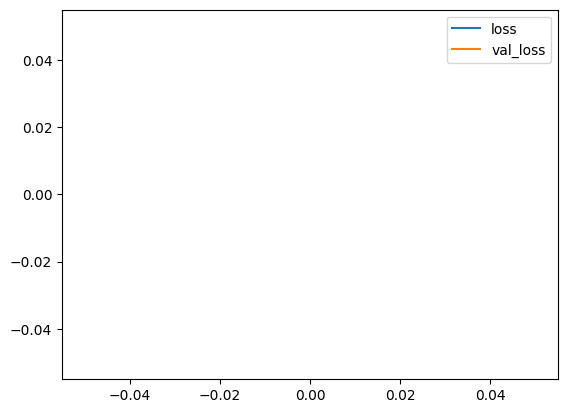

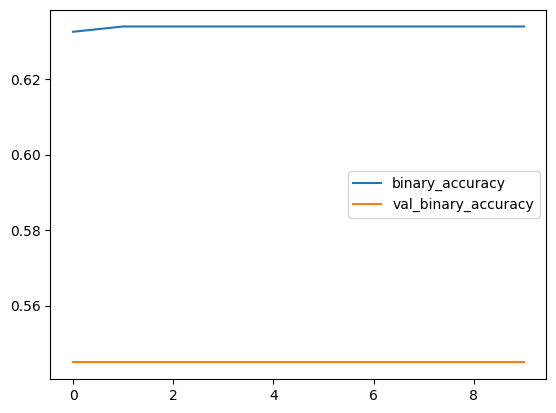

In [31]:

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()